<a href="https://colab.research.google.com/github/tanishq252/AI-ML-DS-Learning-Series/blob/main/NLP_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Here I have worked along with "tsv" tab separated values rather than csv files...
* So first of all we have almost 170k words in oxford dictionary out of which 3k words are having probability of occurence of 95% 
* The problem statement is to create a model for sentiment analysis of whether a person liked the restaurant or not by using bag of words which will take distinct words from all the reviews and create a dataframe accordingly
* After above process we will further proceed to classification based on training and testing data and later we will be trying the input from user side

#Importing dataset and libraraies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# refer to below syntax when you will be working with tsv files
dataSet = pd.read_csv("Restaurant_Reviews.tsv", delimiter = '\t', quoting = 3)

In [11]:
dataSet.shape[0]

1000

#Cleaning Text

In [21]:
import re

# to remove all the unnecessary/ useless words from the file nltk is used 
import nltk

nltk.download("stopwords")

from nltk.corpus import stopwords

# here we are converting the tense of the words
# ex : loved -> love
from nltk.stem.porter import PorterStemmer

corpus = []
rawReview = []

for i in range(dataSet.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', dataSet['Review'][i])  # here we are using regular expressions to fetch the given string of the line we are iterating in the given file
  # we are replacing all the characters except aplhabets in lower and upper case along with emmpty spaces 
  review = review.lower() # lower all the words
  review = review.split() # split the sentence and create a list so that every entity is a string
  ps = PorterStemmer()
  # after comparison in initial lines we can see that "not" is a stopword hence not considering it can lead to wrong review
  all_stopwords = set(stopwords.words('english'))
  all_stopwords.remove('not')
  review = [ps.stem(j) for j in review if j not in all_stopwords] #
  review = ' '.join(review)
  corpus.append(review)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
print(dataSet.iloc[:,0].values)

['Wow... Loved this place.' 'Crust is not good.'
 'Not tasty and the texture was just nasty.'
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'
 'The selection on the menu was great and so were the prices.'
 'Now I am getting angry and I want my damn pho.'
 "Honeslty it didn't taste THAT fresh.)"
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.'
 'The fries were great too.' 'A great touch.' 'Service was very prompt.'
 'Would not go back.'
 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.'
 'I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!'
 'I was disgusted because I was pretty sure that was human hair.'
 'I was shocked because no signs indicate cash only.'
 'Highly recommended.' 'Waitress was a little slow in service.'
 'This place is not worth your time, let alone Vegas.'
 'did not like at all.' 'The Burrittos Blah!'

In [22]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

In [18]:
# as we can differentiate above the reviews before text cleaning are very raw
# whereas when we perform text cleaning on them we can experience that only keywords are extracted from the reviews and appended to the list

#Creating bag of words model

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)

# basically the following command will ensure that all unique words are taken from "corpus" and organize them in tabular form in such a way that each unique word represents a column
# from theorticak pov it is similar to the bag of words array
x = cv.fit_transform(corpus).toarray()
y = dataSet.iloc[:,-1].values

In [27]:
len(x[0])

1500

In [28]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [ ]:
# we are having 1566 distinct words in our dataset

In [31]:
x[3]

array([0, 0, 0, ..., 0, 0, 0])

#Splitting dataset in training and testing sets respectively

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state = 42)

In [33]:
x_train, x_test, y_train, y_test 

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
        0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,

In [96]:
print(len(y_train), len(y_test))

750 250


#Creating list to append the test scores of all powerful classification models

In [69]:
model_name = []
train_accuracy = []
test_accuracy = []


#Training Naive Bayes model on training test

In [70]:
from sklearn.naive_bayes import GaussianNB
nbModel = GaussianNB()
nbModel.fit(x_train, y_train)

GaussianNB()

In [71]:
nbModel.score(x_train, y_train)

0.9306666666666666

In [72]:
nbModel.score(x_test, y_test)

0.68

In [73]:
model_name.append("Naive Bayes")
train_accuracy.append(nbModel.score(x_train, y_train)*100)
test_accuracy.append(nbModel.score(x_test, y_test)*100)

#Training Random Forest model on training test

In [74]:
from sklearn.ensemble import RandomForestClassifier
RFModel = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state=0)

In [75]:
RFModel.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [76]:
RFModel.score(x_train, y_train)

0.9893333333333333

In [77]:
RFModel.score(x_test, y_test)

0.748

In [78]:
model_name.append("Random Forest")
train_accuracy.append(RFModel.score(x_train, y_train)*100)
test_accuracy.append(RFModel.score(x_test, y_test)*100)

#Training SVM(non-linear kernel) model on training test

In [79]:
from sklearn.svm import SVC
# we will be linear kernel as of now
svmModel = SVC(kernel = 'rbf', random_state=42)

In [80]:
svmModel.fit(x_train, y_train)


SVC(random_state=42)

In [81]:
svmModel.score(x_train, y_train)


0.9826666666666667

In [82]:
svmModel.score(x_test, y_test)


0.776

In [83]:
model_name.append("Support Vector Machine non linear kernels")
train_accuracy.append(svmModel.score(x_train, y_train)*100)
test_accuracy.append(svmModel.score(x_test, y_test)*100)

In [87]:
for i in range(3):
  print("Model : "+model_name[i]+" has training accuracy of "+str(train_accuracy[i])[:7]+" and testing accuracy of "+str(test_accuracy[i]))

Model : Naive Bayes has training accuracy of 93.0666 and testing accuracy of 68.0
Model : Random Forest has training accuracy of 98.9333 and testing accuracy of 74.8
Model : Support Vector Machine non linear kernels has training accuracy of 98.2666 and testing accuracy of 77.60000000000001


In [88]:
# as per the observations SVM is the most impactful model with high training and testing accuracies

#Confusion Matrix

In [93]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, svmModel.predict(x_test))

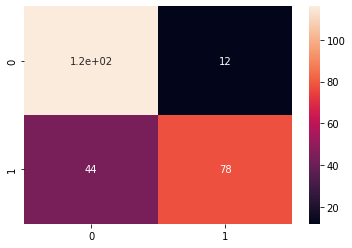

In [94]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [95]:
print(cm)

[[116  12]
 [ 44  78]]


In [98]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = cm.ravel()

print('\nTEST METRICS ----------------------')
acc = (tp+tn)/(tp+tn+fp+fn)*100
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round(svmModel.score(x_train, y_train)*100, 2)))

print('CONFUSION MATRIX ------------------')
print(cm)


TEST METRICS ----------------------
Accuracy: 77.60000000000001%
Precision: 86.66666666666667%
Recall: 63.934426229508205%
F1-score: 73.58490566037737

TRAIN METRIC ----------------------
Train acc: 98.27
CONFUSION MATRIX ------------------
[[116  12]
 [ 44  78]]
